___

___
# Linear Regression Project

We just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [10]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 
* **Yearly Amount Spent** : The amount spent by the customers annually

**Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [2]:
Ecom=pd.read_csv('Ecommerce Customers')

**Check the head of customers, and check out its info() and describe() methods.**

In [3]:
Ecom.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
Ecom.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [5]:
Ecom.nunique()

Email                   500
Address                 500
Avatar                  138
Avg. Session Length     500
Time on App             500
Time on Website         500
Length of Membership    500
Yearly Amount Spent     500
dtype: int64

In [6]:
Ecom.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [7]:
Ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


# Removing useless columns from the data

In [50]:
# Email and Address being qualitative columns are removed
Ecom.drop(['Email', 'Address'],axis=1,inplace=True)

In [51]:
#Checking the head of the dataframe
Ecom.head()

,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


## Exploratory Data Analysis

**Let's explore the data!**


### Visualize distribution of all the Continuous Predictor variables in the data using histograms
Based on the Basic Data Exploration, Five continuous predictor variables 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'

array([[<AxesSubplot:title={'center':'Avg. Session Length'}>,
        <AxesSubplot:title={'center':'Time on App'}>],
       [<AxesSubplot:title={'center':'Time on Website'}>,
        <AxesSubplot:title={'center':'Length of Membership'}>],
       [<AxesSubplot:title={'center':'Yearly Amount Spent'}>,
        <AxesSubplot:>]], dtype=object)

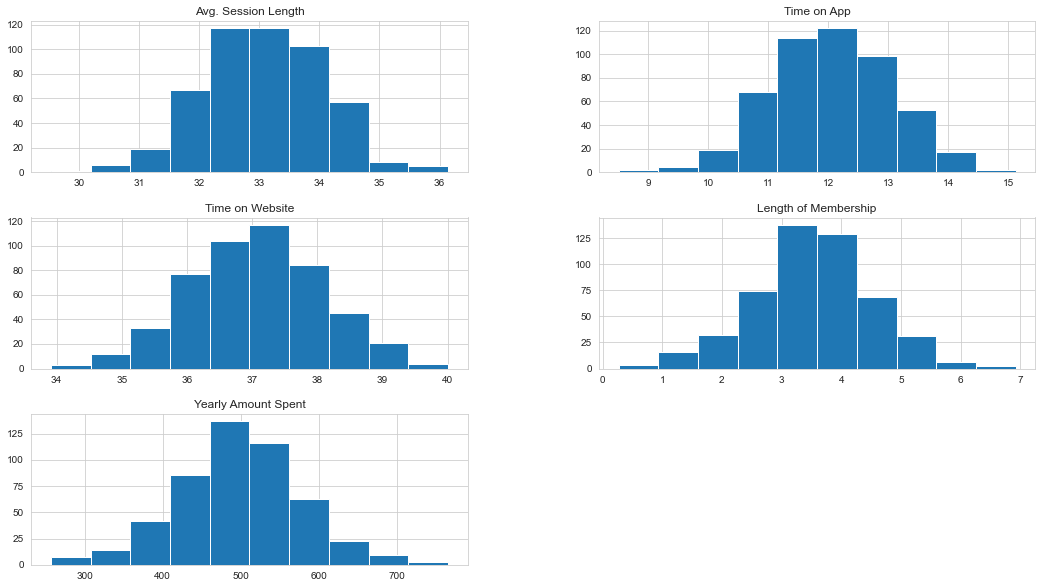

In [8]:
# Plotting histograms of multiple columns together
Ecom.hist(['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'], figsize=(18,10))

## Histogram Interpretation
Histograms shows us the data distribution for a single continuous variable.

The X-axis shows the range of values and Y-axis represent the number of values in that range. For example, in the above histogram of "Yearly Amount Spent", there are around 125 rows in data that has a value between 450 to 500.

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

<b>Selected Continuous Variables:</b>
* <b>Avg. Session Length</b> : Selected. The distribution is good.
* <b>Time on App</b>: Selected. The distribution is good. Outliers are seen near 14, need to treat them
* <b>Time on Website</b>: Selected. The distribution is good.
* <b>Length of Membership</b>: Selected. The distribution is good.
* <b>Yearly Amount Spent</b>: Selected. The distribution is good.

# Outlier treatment
Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the histogram.

Outlier must be treated one column at a time. As the treatment will be slightly different for each column.

<b>Why I should treat the outliers?</b>

Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

There are below two options to treat outliers in the data. 
* Option-1: Delete the outlier Records. Only if there are just few rows lost.
* Option-2: Impute the outlier values with a logical business value

Below we are finding out the most logical value to be replaced in place of outliers by looking at the histogram.

### Treating outliers for 'Time on App' column

In [31]:
# Finding logical value near 14
Ecom['Time on App'][Ecom['Time on App']>14].sort_values(ascending=False)

65     14.700000
18     14.700000
260    14.426491
286    14.325655
340    14.288015
         ...    
61      9.607315
369     9.477778
362     9.316289
442     8.668350
309     8.508152
Name: Time on App, Length: 500, dtype: float64

In [11]:
# Replacing outliers with nearest logical value
Ecom['Time on App'][Ecom['Time on App']>14.7]=14.7

### Treating outliers for 'Avg. Session Length' column

In [44]:
# Finding logical value near 30
Ecom['Avg. Session Length'][Ecom['Avg. Session Length']<30].sort_values(ascending=False)

12    29.532429
Name: Avg. Session Length, dtype: float64

In [46]:
Ecom['Avg. Session Length'][Ecom['Avg. Session Length']<30]=30

### Visualizing the distribution again after outlier treatment

array([[<AxesSubplot:title={'center':'Avg. Session Length'}>,
        <AxesSubplot:title={'center':'Time on App'}>]], dtype=object)

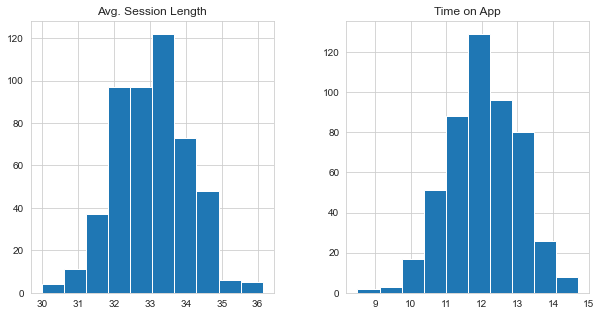

In [49]:
Ecom[['Avg. Session Length','Time on App']].hist(figsize=(10,5))

# Missing values treatment
Missing values are treated for each column separately.

If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.

There are below options for treating missing values in data.

* Interpolate the values based on business logic
* Impute the missing values with MEDIAN value for continuous variables
* Impute the missing values with MODE value for categorical variables
* Interpolate the values based on nearby values
* Delete the missing value rows if there are only few records

<AxesSubplot:>

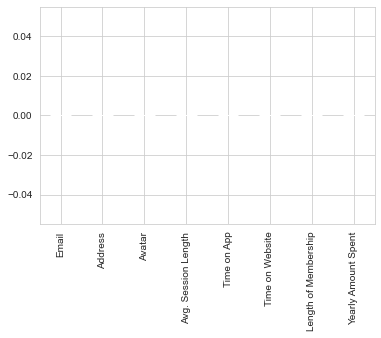

In [17]:
# Finding how many missing values are there for each column
Ecom.isnull().sum().plot(kind='bar')

**No missing values are present in the dataset**

# Feature Selection (Bi-Variate analysis)
Now its time to finally choose the best columns(Features) which are correlated to the Target variable.
This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

I have listed below the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.

## Visual exploration of relationship between variables
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Box Plot
* Categorical Vs Categorical---- Grouped Bar Plots

## Statistical measurement of relationship strength between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test

In this case study the Target variable is Continuous, hence below two scenarios will be present
* Continuous Target Variable Vs Continuous Predictor
* Continuous Target Variable Vs Categorical Predictor

# Relationship exploration: Continuous Vs Continuous -- Scatter Charts
When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using pearson's correlation value.

**Here we will use seaborn's jointplot and pairplot to understand the relationship between continuous variables.**

**Jointplot to compare the Time on Website and Yearly Amount Spent columns.**

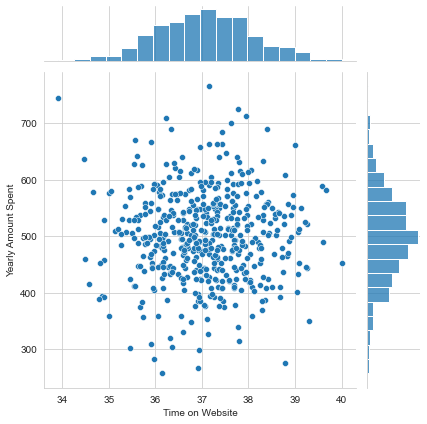

In [17]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=Ecom)

**Doing the same but with the Time on App column instead.**

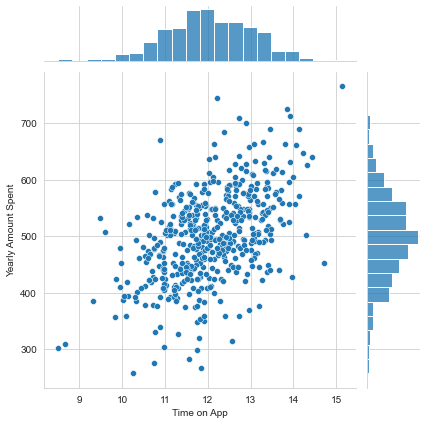

In [18]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=Ecom)

**2D hex bin plot comparing Time on App and Length of Membership**

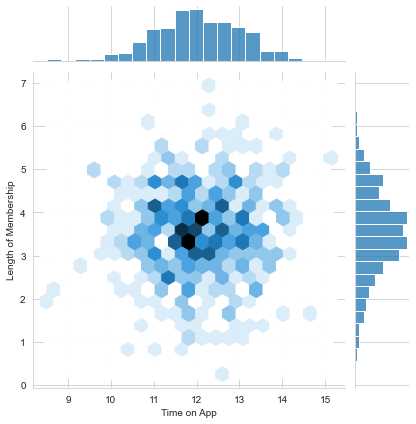

In [19]:
sns.jointplot(x='Time on App',y='Length of Membership',data=Ecom,kind='hex')

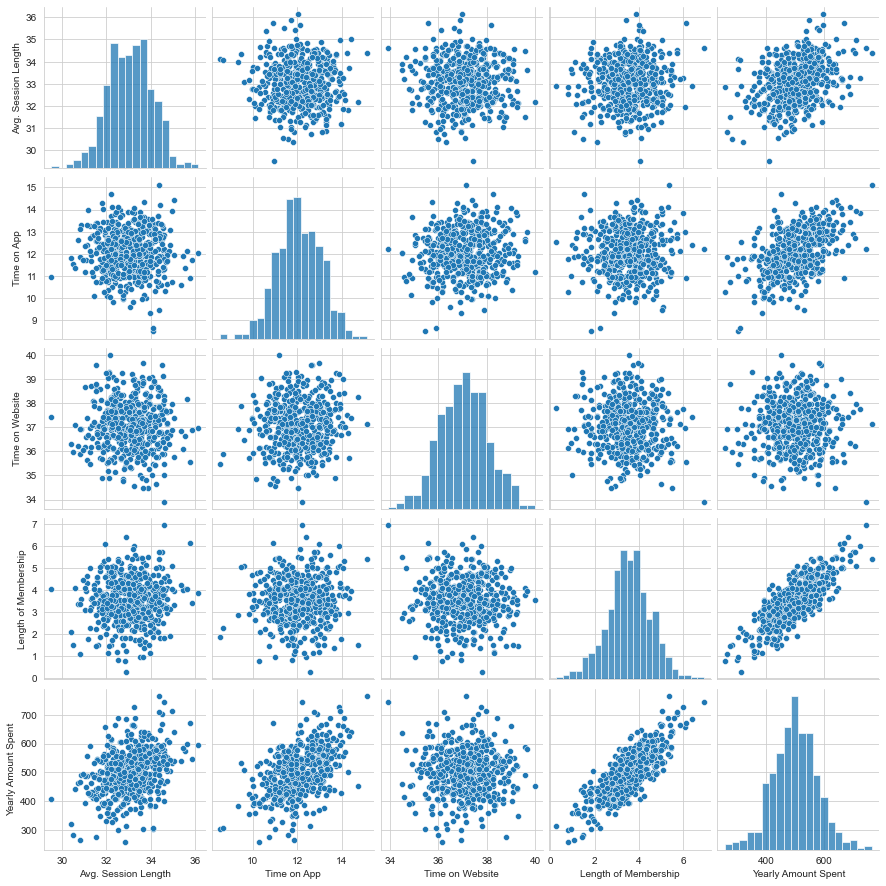

In [20]:
sns.pairplot(data=Ecom)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

In [20]:
#Length of membership

**A linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership.**

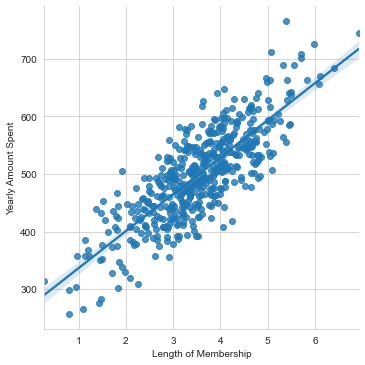

In [21]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=Ecom)

# Statistical Feature Selection (Continuous Vs Continuous) using Correlation value

Pearson's correlation coefficient can simply be calculated as
the covariance between two features $x$ and $y$ (numerator) divided by the product
of their standard deviations (denominator)

This value can be calculated only between two numeric columns
* Correlation between [-1,0) means inversely proportional, the scatter plot will show a downward trend
* Correlation between (0,1] means directly proportional, the scatter plot will show a upward trend
* Correlation near {0} means No relationship, the scatter plot will show no clear trend.
* If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship <b>the sign does not matter</b>
* We observe the correlations between Target variable and all other predictor variables(s) to check which columns/features/predictors are actually related to the target variable in question

<AxesSubplot:>

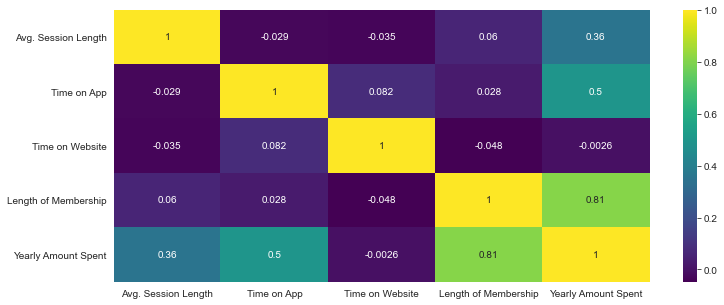

In [28]:
plt.figure(figsize=(12,5))
sns.heatmap(Ecom.iloc[:,3:].corr(),cmap='viridis',annot=True)

In [30]:
# Filtering only those columns where absolute correlation > 0.2 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData=Ecom.iloc[:,3:].corr()
CorrelationData['Yearly Amount Spent'][abs(CorrelationData['Yearly Amount Spent']) > 0.2 ]

Avg. Session Length     0.355088
Time on App             0.497733
Length of Membership    0.809084
Yearly Amount Spent     1.000000
Name: Yearly Amount Spent, dtype: float64

<b>Final selected Continuous columns:</b>

'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership'

# Relationship exploration: Categorical Vs Continuous -- Box Plots
When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots and measure the strength of relation using Anova test

In [54]:
Ecom['Avatar'].unique()

array(['Violet', 'DarkGreen', 'Bisque', 'SaddleBrown', 'MediumAquaMarine',
       'FloralWhite', 'DarkSlateBlue', 'Aqua', 'Salmon', 'Brown',
       'Tomato', 'RoyalBlue', 'DarkBlue', 'Peru', 'PowderBlue',
       'OliveDrab', 'Cyan', 'LightSeaGreen', 'PeachPuff', 'Black',
       'Olive', 'Silver', 'Wheat', 'Teal', 'Linen', 'MediumSlateBlue',
       'LemonChiffon', 'DarkOrchid', 'SeaGreen', 'SteelBlue',
       'DarkMagenta', 'DarkGoldenRod', 'DarkSeaGreen', 'Gainsboro',
       'HotPink', 'HoneyDew', 'WhiteSmoke', 'GhostWhite', 'Chocolate',
       'Snow', 'BurlyWood', 'Moccasin', 'BlueViolet', 'MediumBlue',
       'GreenYellow', 'SandyBrown', 'MediumVioletRed', 'DarkOliveGreen',
       'DarkSalmon', 'DeepPink', 'SkyBlue', 'Magenta', 'DarkTurquoise',
       'SpringGreen', 'OrangeRed', 'LimeGreen', 'LightGreen',
       'LightYellow', 'MintCream', 'DimGray', 'Indigo', 'LightSalmon',
       'DeepSkyBlue', 'Turquoise', 'LightSteelBlue', 'Cornsilk',
       'DarkKhaki', 'FireBrick', 'SlateGray',

<AxesSubplot:title={'center':'Yearly Amount Spent'}, xlabel='Avatar'>

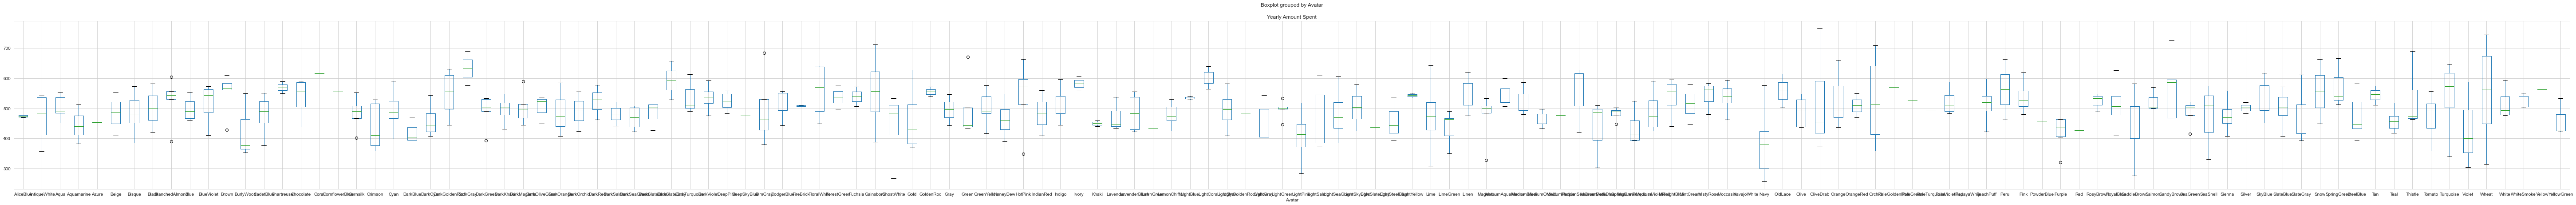

In [57]:
Ecom.boxplot(column='Yearly Amount Spent', by='Avatar', figsize=(100,7), vert=True)

# Box-Plots interpretation
<b>What should you look for in these box plots? </b>

These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

On the other hand if the distribution is different for each category(the boxes are not in same line!). It hints that these variables might be correlated with Price.

In this data,  the categorical predictors looks correlated with the Target variable.

We confirm this by looking at the results of ANOVA test below

# Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable
* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)
* ANOVA Test result: Probability of H0 being true

In [59]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            # Accepting the H0 if the P value is more than 0.05
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [60]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['Avatar']
FunctionAnova(inpData=Ecom, 
              TargetVariable='Yearly Amount Spent', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

Avatar is NOT correlated with Yearly Amount Spent | P-Value: 0.6303059595013905


[]

**No categorical variables are selected**

# Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

In [86]:
SelectedColumns=['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership','Yearly Amount Spent']

# Selecting final columns
DataForML=Ecom[SelectedColumns]
DataForML.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


## Data Pre-processing for Machine Learning
List of steps performed on predictor variables before data can be used for machine learning
1. Converting each Ordinal Categorical columns to numeric
2. Converting Binary nominal Categorical columns to numeric using 1/0 mapping
3. Converting all other nominal categorical columns to numeric using pd.get_dummies()
4. Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks

**In this data there are no Categorical columns**

## Machine Learning: Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [63]:
DataForML.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')

In [83]:
Predictors=['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']
TargetVariable='Yearly Amount Spent'
X=DataForML[Predictors].values
y=DataForML[TargetVariable].values

In [89]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

Now its time to train our model on our training data!

In [101]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
prediction=LREG.predict(X_test)
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)


# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Yearly Amount Spent']-TestingDataResults['PredictedYearly Amount Spent']))/TestingDataResults['Yearly Amount Spent'])

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable, 'APE']].head())


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.9817562058732432

##### Model Validation and Accuracy Calculations ##########
   Yearly Amount Spent  PredictedYearly Amount Spent       APE
0           452.315675                         456.0  0.814547
1           401.033135                         403.0  0.490449
2           410.069611                         409.0  0.260836
3           599.406092                         591.0  1.402404
4           586.155870                         590.0  0.655820
Mean Accuracy on test data: 98.54566110763442
Median Accuracy on test data: 98.76597362885254

Accuracy values for 10-fold Cross Validation:
 [98.48181418 98.3946864  98.31828528 98.43301507 98.51497883 98.4780349
 98.14037577 98.29626089 98.33834292 98.19310099]

Final Average Accuracy of the model: 98.36


**# Looking at the coefficients for each column**

In [104]:
print('Coefficients: \n', LREG.coef_)
print('Intercept: \n', LREG.intercept_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]
Intercept: 
 -1047.9327822502391


**Creating a scatterplot of the real test values versus the predicted values.**

Text(0, 0.5, 'Predicted Y')

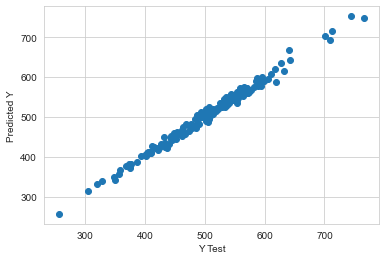

In [94]:
plt.scatter(y_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

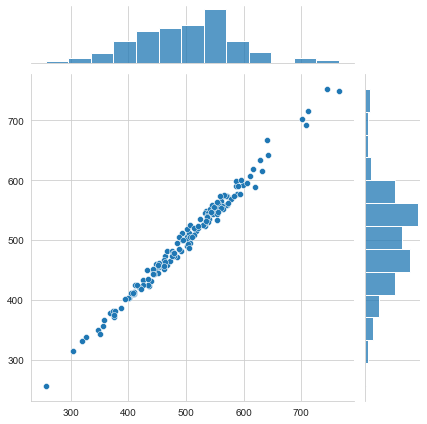

In [96]:
sns.jointplot(y_test,prediction,TestingDataResults)

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

**Calculating the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.**

In [48]:
from sklearn import metrics
print('MAE: ',metrics.mean_absolute_error(y_test,prediction))
print('MSE: ',metrics.mean_squared_error(y_test,prediction))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R-squared: ', metrics.r2_score(y_test,prediction))

MAE:  7.228148653430824
MSE:  79.81305165097434
RMSE:  8.933815066978628
R-squared:  0.9890046246741234


## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed.**

Text(0.5, 0, 'Yearly Amount Spent')

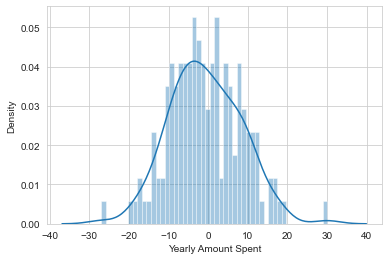

In [98]:
sns.distplot((y_test-prediction),bins=50)
plt.xlabel('Yearly Amount Spent')

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.


In [106]:
coef=pd.DataFrame(LREG.coef_,Predictors)
coef.columns=['Coefficients']
coef

,Coefficients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


**How can you interpret these coefficients?**

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.

**Do you think the company should focus more on their mobile app or on their website?**

There are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company, though there isn't any linear relationship between Time spent on website and Length of membership, so its better to focus on the app.
